## Case Study: Analyzing the Impact of Time Spent on App and Website on Yearly Amount Spent in E-commerce

This study examines the relationship between time spent on an e-commerce site's app and website and the corresponding yearly amount spent by customers. By analyzing these factors, we seek to identify which platform app or website contributes most significantly to customer spending and making some prediction, to enabling targeted strategies for revenue enhancement in online retail.

Data Source : https://www.kaggle.com/datasets/srolka/ecommerce-customers

## Importing Libraries (Toolkit):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing & Inspecting Data

In [77]:
# Read the CSV file 'Ecommerce Customers.csv' into a pandas DataFrame named 'ecom'
ecom = pd.read_csv('Ecommerce Customers.csv')

In [79]:
# Displaying the first few rows of the DataFrame 'ecom' to get a quick
# overview of its structure and content.
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [78]:
# Displaying a concise summary of the DataFrame 'ecom' to provide information
# about its structure, column data types, non-null values, and memory usage.
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
ecom.describe().round(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,11.98,37.07,3.53,498.89
75%,33.71,12.75,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


## Exploring Data :

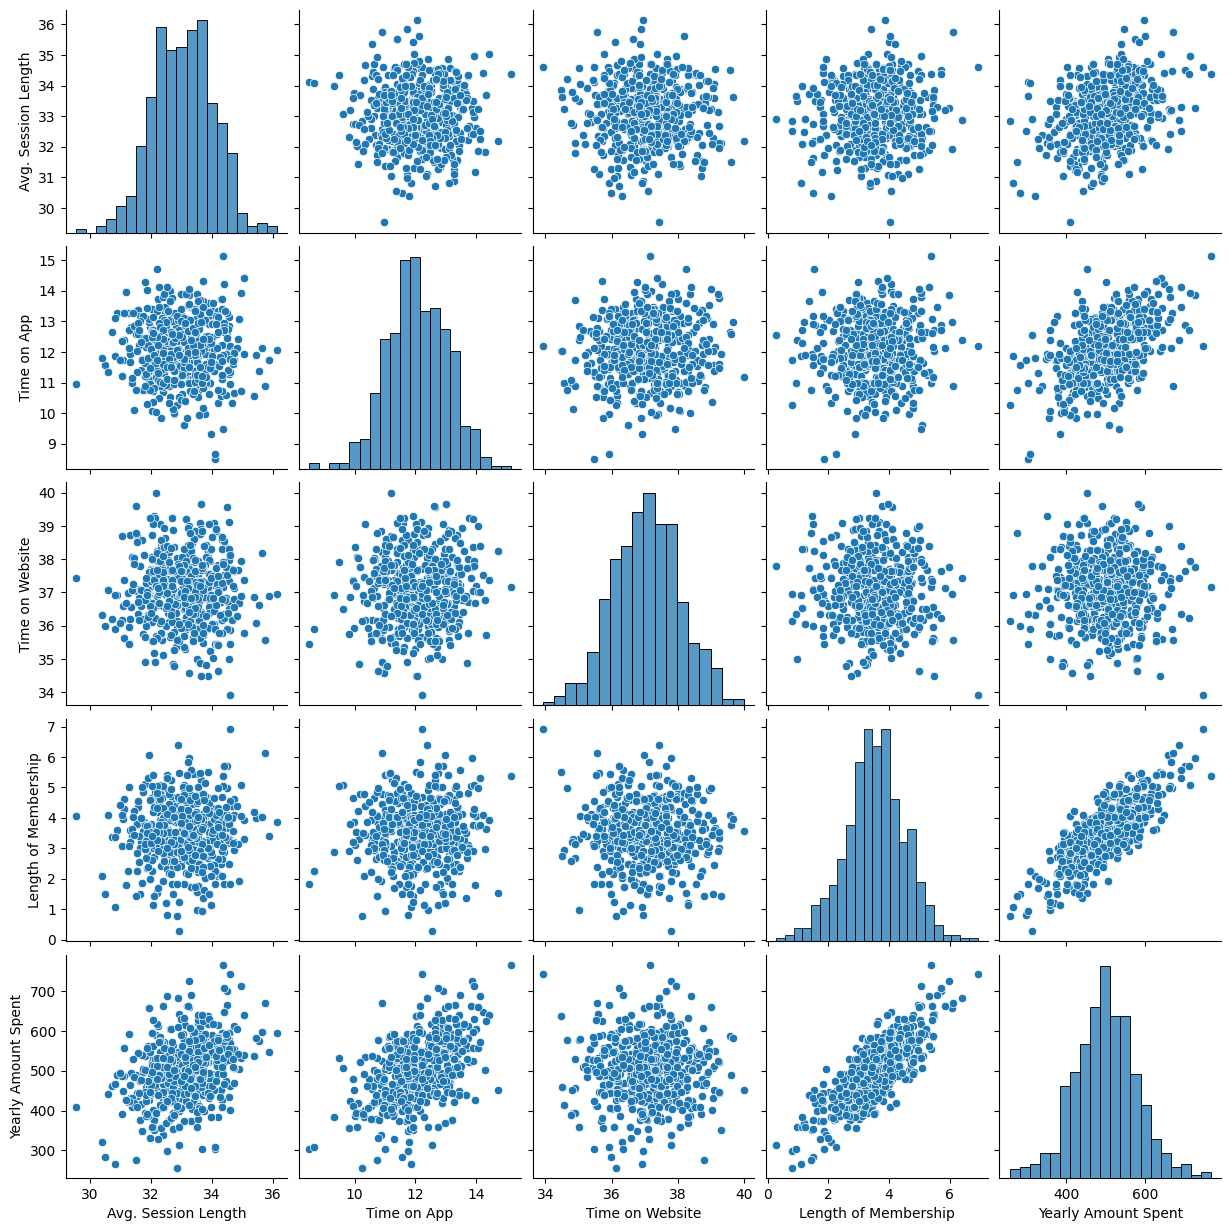

In [80]:
# Creating a pairplot to visualize pairwise relationships in the DataFrame 'ecom'.
sns.pairplot(ecom)

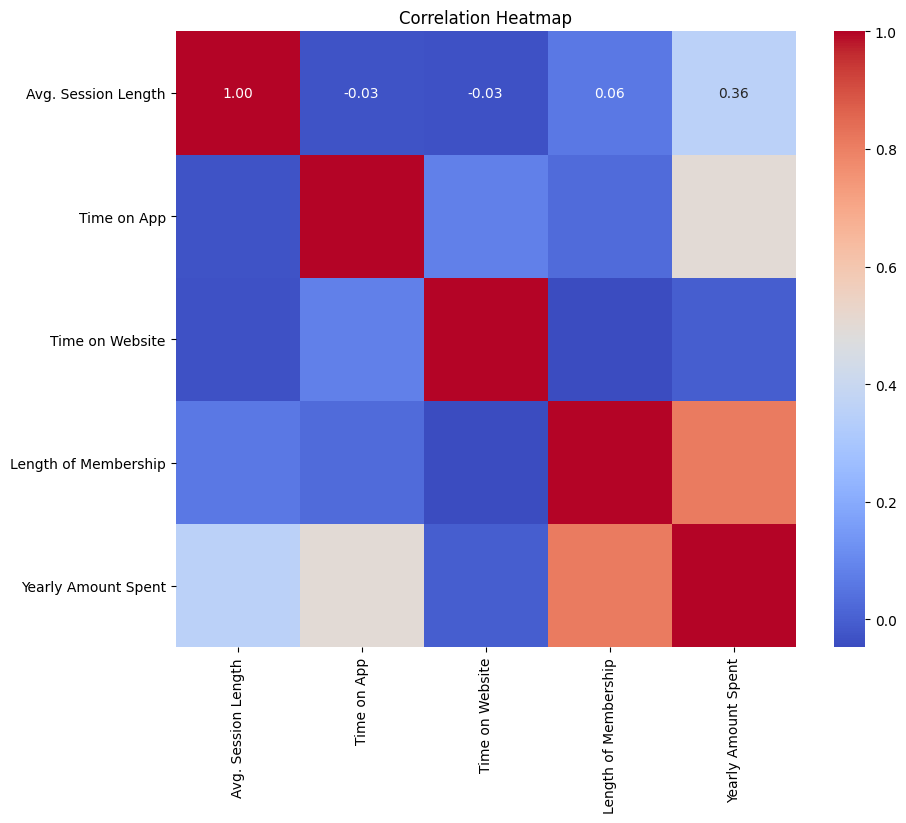

In [20]:
#Identify Non Numeric Columns
non_numeric_columns = ecom.select_dtypes(exclude=['float', 'int']).columns

#Handle Non Numeric Data
ecom_numeric = ecom.drop(columns=non_numeric_columns)

#Compute Correlation Matrix
correlation_matrix = ecom_numeric.corr()

#Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()

## Relationship Between Length of Membership and Yearly Amount Spent:


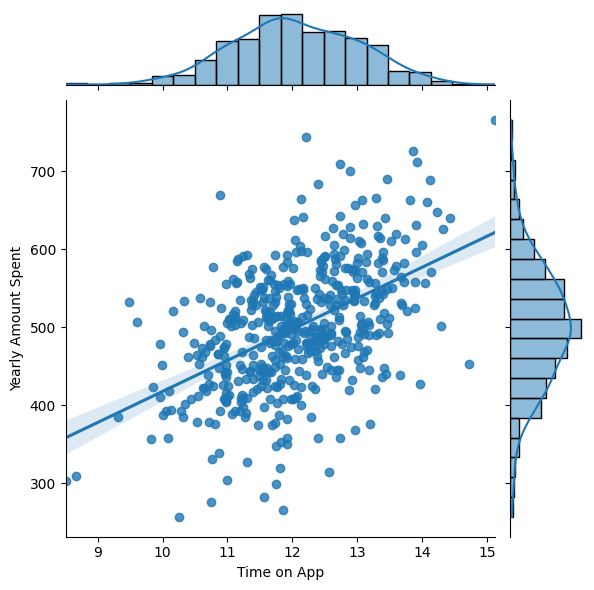

In [84]:
# Create a jointplot to visualize the relationship between 'Length of Membership' and 'Yearly Amount Spent',
# with a linear regression line ('kind='reg') to highlight the trend.
jointplot = sns.jointplot(data=ecom, x='Time on App', y='Yearly Amount Spent', kind='reg')

# Set axis labels for the jointplot to improve clarity and interpretability.
jointplot.set_axis_labels("Time on App", "Yearly Amount Spent")

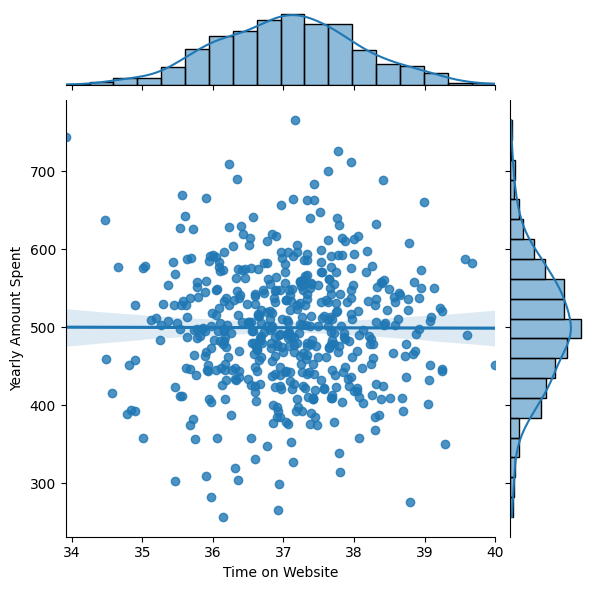

In [82]:
# Create a jointplot to visualize the relationship between 'Time on Website' and 'Yearly Amount Spent',
# with a linear regression line ('kind='reg') to highlight the trend.
jointplot = sns.jointplot(data=ecom, x='Time on Website', y='Yearly Amount Spent', kind='reg')

# Set axis labels for the jointplot to improve clarity and interpretability.
jointplot.set_axis_labels("Time on Website", "Yearly Amount Spent")

Based on the visualization created using a jointplot with a linear regression line, it's evident that there is a positive correlation between the time spent on the app and the yearly amount spent by customers. The linear regression line indicates a positive slope, suggesting that as the time spent on the app increases, the yearly amount spent also tends to increase.

# Data Splitting:

In [39]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [86]:
# Assigning the 'Yearly Amount Spent' column from the 'ecom' DataFrame to the variable 'y'
# This variable 'y' represents the output or target variable for the regression model
y = ecom['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [87]:
# Selecting the relevant feature columns from the 'ecom' DataFrame and assigning them to the variable 'x'
# These features include 'Avg. Session Length', 'Time on App', 'Time on Website', and 'Length of Membership'
# The variable 'x' will serve as the input features for the regression model
x = ecom[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [45]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building & Training :

Model Training :

In [88]:
# Importing the train_test_split function from the sklearn.model_selection module
# This function is used to split the dataset into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

In [89]:
# Creating an instance of the LinearRegression model from the sklearn library
# This instance will be used to fit the regression model to our data
model = LinearRegression()

In [90]:
# Fitting the LinearRegression model to the training data
# This trains the model using the input features (x_train) and the target variable (y_train)
model.fit(x_train, y_train)

LinearRegression()

Model Prediction Test :

In [91]:
# Using the trained LinearRegression model to make a prediction
# The model predicts the 'Yearly Amount Spent' based on the provided input features
# Here, the features are: 'Avg. Session Length' = 70, 'Time on App' = 50, 'Time on Website' = 80, and 'Length of Membership' = 17
predicted_value = model.predict([[70, 50, 80, 17]])
predicted_value

array([3763.82498232])

In [92]:
# Using the trained LinearRegression model to make predictions on the test set
# The model predicts the 'Yearly Amount Spent' for the input features in the test set (x_test)
# The predicted values are stored in the variable 'y_pred'
y_pred = model.predict(x_test)
y_pred

array([402.86230051, 542.53325708, 426.62011918, 501.91386363,
       409.6666551 , 569.92155038, 531.50423529, 505.94309188,
       408.10378607, 473.45942928, 441.18668812, 424.52463471,
       424.83341694, 527.12061508, 430.87985533, 423.47062047,
       575.8751518 , 484.6563331 , 457.77896975, 481.58742311,
       501.56110993, 513.12815188, 507.49166899, 646.63377343,
       449.70050586, 496.26290484, 556.18523776, 554.78684161,
       399.1582784 , 325.16921284, 532.62732659, 477.73025415,
       500.76491535, 305.09971374, 505.46811902, 483.52069444,
       519.09464122, 437.75549737, 456.25005245, 470.63517876,
       494.11207805, 444.65549239, 508.57079732, 500.88197484,
       488.35128728, 535.34025218, 594.58301773, 513.59474408,
       279.69877702, 432.71590835, 421.06976164, 480.94327496,
       584.59481888, 608.61734059, 564.42312991, 494.47224504,
       393.95593318, 456.11321352, 572.92228417, 499.27385693,
       512.42973545, 391.56170305, 479.60705887, 481.05

In [93]:
# Extracting the actual 'Yearly Amount Spent' values from the test set
# These are the true target values corresponding to the input features in the test set
y_test_values = y_test.values
y_test_values

array([401.03313522, 534.7771881 , 418.6027421 , 503.97837905,
       410.06961106, 557.60826205, 538.94197453, 514.33655827,
       408.62018783, 475.01540709, 427.1993849 , 434.02169975,
       411.18696357, 533.51493526, 447.3690272 , 407.54216801,
       573.84743772, 497.5866713 , 466.42119882, 467.80092437,
       510.40138845, 510.50147847, 511.97985999, 640.5840619 ,
       444.2859075 , 502.77107457, 551.62014548, 548.51852928,
       390.10327297, 330.59444603, 535.32161009, 478.60091594,
       499.14015245, 298.76200786, 487.54750487, 498.63559849,
       512.16586639, 444.96655165, 468.6684656 , 483.15972078,
       474.53232944, 439.07476674, 515.50247966, 485.92313052,
       491.07322368, 544.77986372, 587.95105397, 522.33740461,
       275.91842065, 436.51560573, 418.1500811 , 493.71919298,
       573.30622226, 608.27181662, 545.94549214, 483.67330802,
       424.18549429, 452.31567548, 568.71757593, 488.78606109,
       510.66179222, 376.49684072, 473.36049557, 479.24

## Model Evaluation :

In [94]:
# Calculating the coefficient of determination (R^2 score) of the trained LinearRegression model
# This score quantifies the goodness of fit of the model to the entire dataset (x, y)
# It measures the proportion of the variance in the target variable 'y' that is predictable from the input features 'x'
model.score(x, y)

0.9842900924920523

In [95]:
# Importing mean_absolute_error and mean_squared_error functions from the sklearn.metrics module
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [96]:
# Calculating the mean absolute error (MAE) between the actual 'Yearly Amount Spent' values (y_test)
# and the predicted values (y_pred) obtained from the LinearRegression model
# MAE measures the average absolute difference between the predicted and actual values
print(mean_absolute_error(y_test, y_pred))

8.558441885315247


In [97]:
# Calculating the mean squared error (MSE) between the actual 'Yearly Amount Spent' values (y_test)
# and the predicted values (y_pred) obtained from the LinearRegression model
# MSE measures the average squared difference between the predicted and actual values
print(mean_squared_error(y_test, y_pred))

109.86374118394002


# Coeffecients :

In [98]:
# Accessing the coefficients (weights) of the features in the trained LinearRegression model
# These coefficients represent the effect of each feature on the target variable 'Yearly Amount Spent'
model.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

## Case Study Summary :

Based on the linear regression prediction model, we observe that the mean absolute error (MAE) and mean squared error (MSE) are both relatively low, indicating that the model predictions are quite accurate. Furthermore, the regression coefficient is positive and significant, reinforcing the conclusion that there is a strong positive correlation between time spent on the app and yearly amount spent by customers. This suggests that increasing engagement on the app can effectively drive higher customer spending.

## THANK YOU!